In [1]:
import importlib

from evaluation import repeat_experiment

import dataset_creation 
importlib.reload(dataset_creation)

#import ensembles
#importlib.reload(ensembles)

import networks
importlib.reload(networks)
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [15, 5]

%matplotlib inline
import tensorflow as tf

from ensembles import BootstrapThroughTimeBobStrap,BootstrapEnsemble, ForcedDiversityBootstrapThroughTime3, ForcedDiversityBootstrapThroughTime

# Linear

In [2]:
num_meta_epochs = 3#100#10
num_epochs = 10#50#15#50
seed = 4200
num_samples = 150

model_params = {'num_epochs':num_epochs,'seed':seed,'initialisation_scheme':tf.keras.initializers.he_normal}

dataset_params = {'seed':seed,'num_samples':num_samples}
num_neurons = [10, 10,10]
num_neurons_nonlinear = [10,10,10,10,5]

activations = [tf.nn.tanh]*len(num_neurons)
model_params = {'initialisation_scheme':tf.keras.initializers.he_normal,
                'activations':activations,'num_neurons':num_neurons,
                'num_epochs':num_epochs,'seed':seed}

experiment started at 2018-08-09 10:36:09.716119
experiment number 1 took 16.04596495628357 seconds. That means the whole run will probably take 48.13789486885071 more seconds and 0.8022982478141785 more minutes.
overall, it took 49.728026151657104 seconds with 3 experiments
             cobeau  coverage      nlpd      rsme
count  3.000000e+00  3.000000  3.000000  3.000000
mean   1.540059e-11  0.281481  1.756090  0.007802
std    2.609300e-11  0.025660  0.068002  0.000373
min    2.383474e-15  0.266667  1.690458  0.007473
25%    3.370275e-13  0.266667  1.721017  0.007600
50%    6.716715e-13  0.266667  1.751576  0.007727
75%    2.309969e-11  0.288889  1.788906  0.007967
max    4.552771e-11  0.311111  1.826237  0.008207
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000e+00 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  1.540059e-11 &  0.281481 &  1.756090 &  0.007802 \\
std   &  2.609300e-11 &  0.025660 &  0.068002 &  0.00

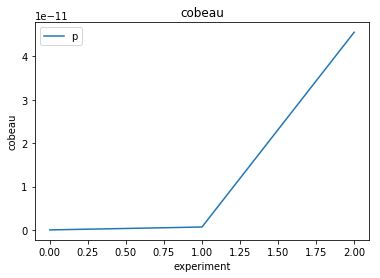

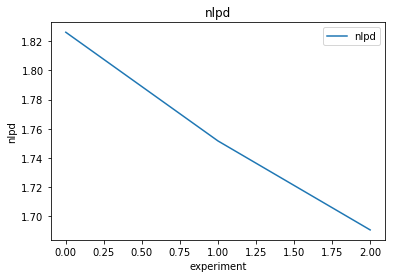

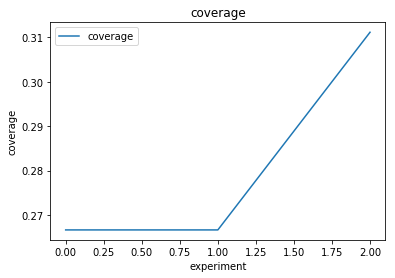

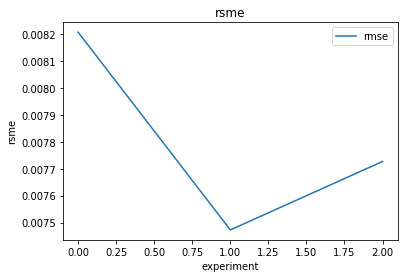

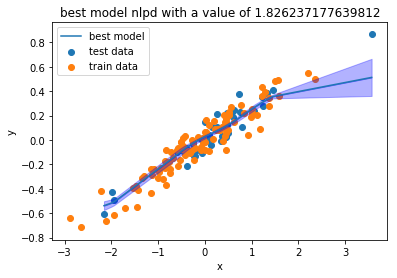

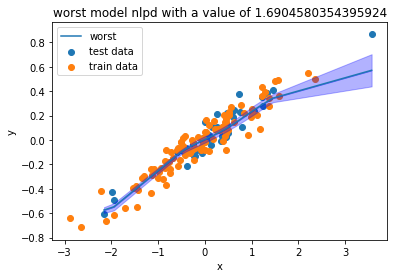

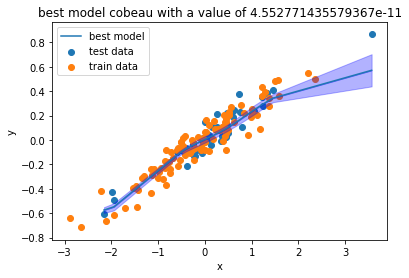

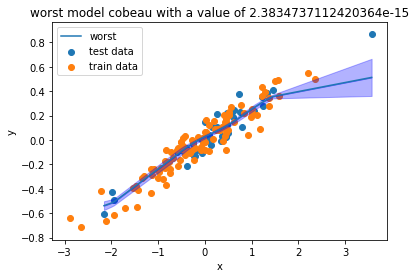

In [3]:
pd = repeat_experiment(BootstrapEnsemble, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-09 10:37:03.438102
experiment number 1 took 26.86443066596985 seconds. That means the whole run will probably take 80.59329199790955 more seconds and 1.3432215332984925 more minutes.
overall, it took 74.32987999916077 seconds with 3 experiments
             cobeau  coverage      nlpd      rsme
count  3.000000e+00  3.000000  3.000000  3.000000
mean   3.540799e-06  0.933333  0.398845  0.099033
std    5.645245e-06  0.058794  0.314893  0.070564
min    2.566886e-07  0.888889  0.058571  0.042023
25%    2.815472e-07  0.900000  0.258283  0.059573
50%    3.064058e-07  0.911111  0.457994  0.077122
75%    5.182855e-06  0.955556  0.568982  0.127538
max    1.005930e-05  1.000000  0.679969  0.177954
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000e+00 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  3.540799e-06 &  0.933333 &  0.398845 &  0.099033 \\
std   &  5.645245e-06 &  0.058794 &  0.314893 &  0.070

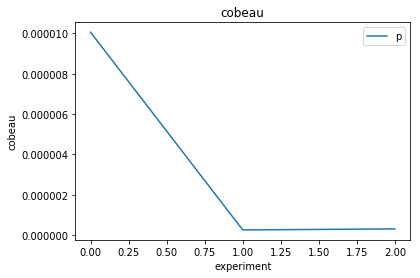

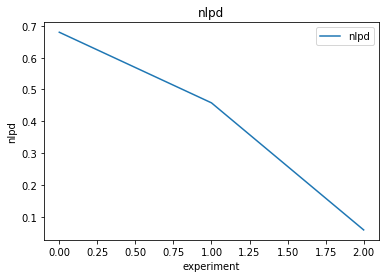

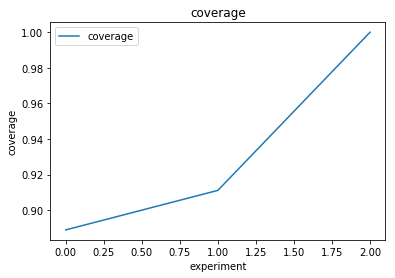

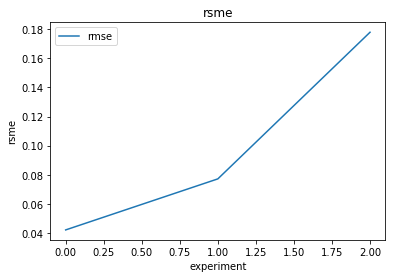

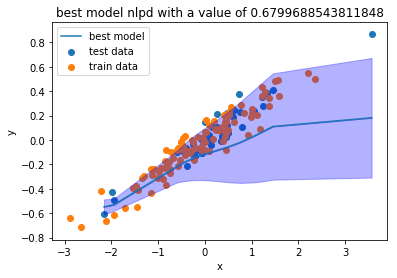

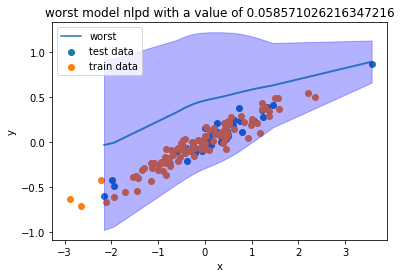

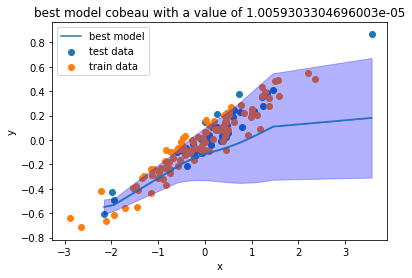

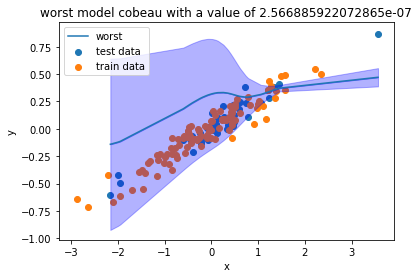

In [4]:
pd1 = repeat_experiment(ForcedDiversityBootstrapThroughTime, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-09 10:38:21.656439
experiment number 1 took 23.217238903045654 seconds. That means the whole run will probably take 69.65171670913696 more seconds and 1.1608619451522828 more minutes.
overall, it took 70.35373115539551 seconds with 3 experiments
         cobeau  coverage      nlpd      rsme
count  3.000000  3.000000  3.000000  3.000000
mean   0.126815  0.970370  0.496062  0.007257
std    0.077910  0.025660  0.275456  0.001334
min    0.037013  0.955556  0.214916  0.005728
25%    0.102041  0.955556  0.361368  0.006792
50%    0.167070  0.955556  0.507820  0.007856
75%    0.171716  0.977778  0.636635  0.008022
max    0.176362  1.000000  0.765451  0.008187
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  0.126815 &  0.970370 &  0.496062 &  0.007257 \\
std   &  0.077910 &  0.025660 &  0.275456 &  0.001334 \\
min   &  0.037013 &  0.955556 &  0.214916 & 

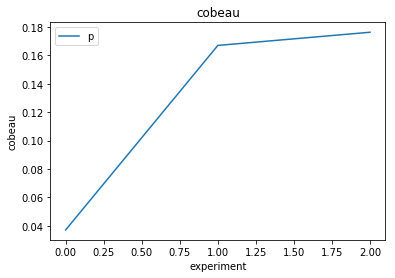

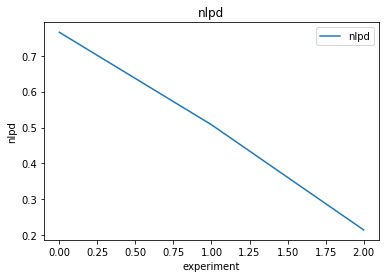

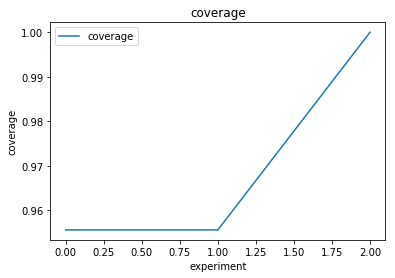

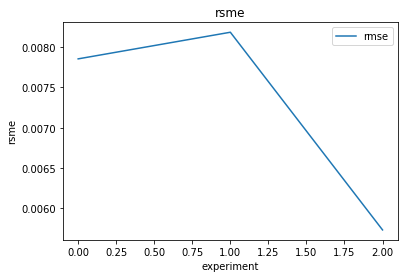

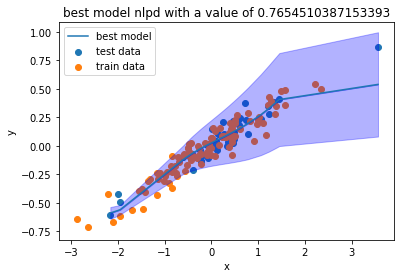

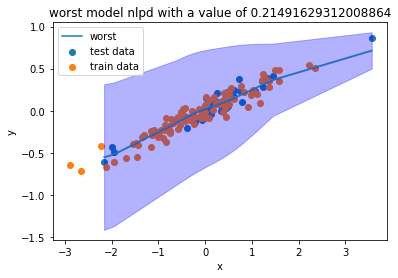

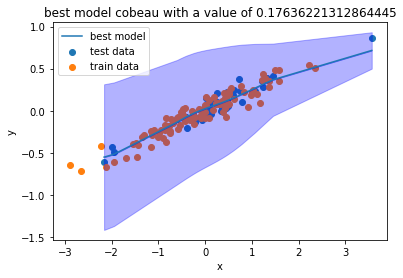

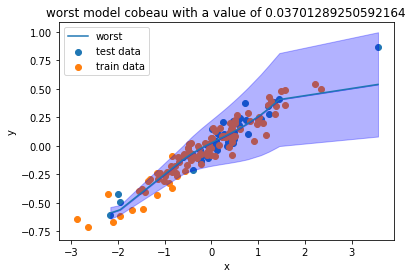

In [5]:
pd2 = repeat_experiment(ForcedDiversityBootstrapThroughTime3, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

# Nonlinear


In [6]:
#num_meta_epochs = 3#10
#num_epochs = 5#50
seed = 42

model_params = {'num_epochs':num_epochs,'seed':seed,'num_neurons':num_neurons_nonlinear}

dataset_params = {'num_samples':num_samples,'seed':seed}
importlib.reload(dataset_creation)

<module 'dataset_creation' from '/Users/thomas/Documents/Master-Thesis/new_version/dataset_creation.py'>

experiment started at 2018-08-09 10:39:35.890419
experiment number 1 took 22.929387092590332 seconds. That means the whole run will probably take 68.788161277771 more seconds and 1.1464693546295166 more minutes.
overall, it took 64.16142416000366 seconds with 3 experiments
         cobeau  coverage      nlpd      rsme
count  3.000000  3.000000  3.000000  3.000000
mean   0.313591  0.444444  0.712468  0.076344
std    0.542078  0.117589  0.010467  0.005829
min    0.000086  0.355556  0.704824  0.070715
25%    0.000622  0.377778  0.706503  0.073339
50%    0.001159  0.400000  0.708183  0.075964
75%    0.470344  0.488889  0.716290  0.079159
max    0.939529  0.577778  0.724397  0.082354
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  0.313591 &  0.444444 &  0.712468 &  0.076344 \\
std   &  0.542078 &  0.117589 &  0.010467 &  0.005829 \\
min   &  0.000086 &  0.355556 &  0.704824 &  0

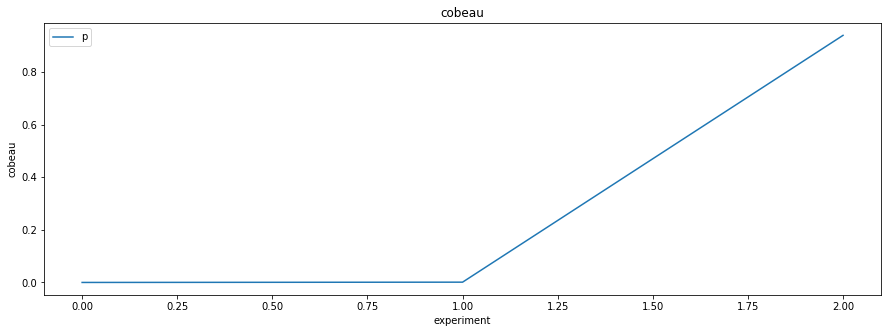

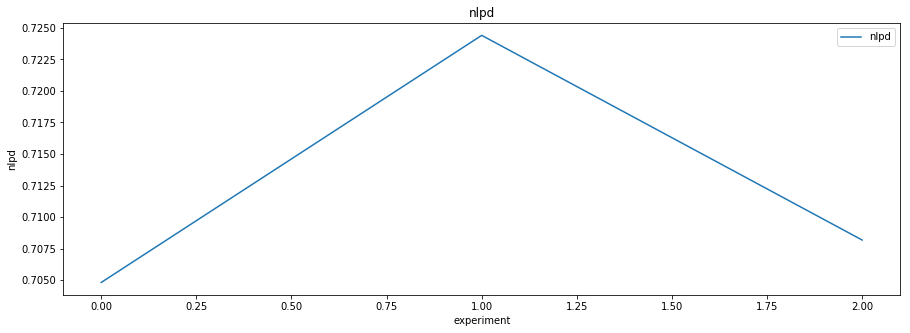

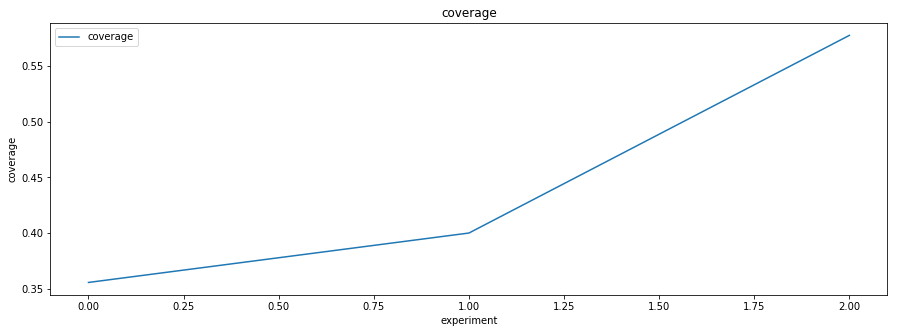

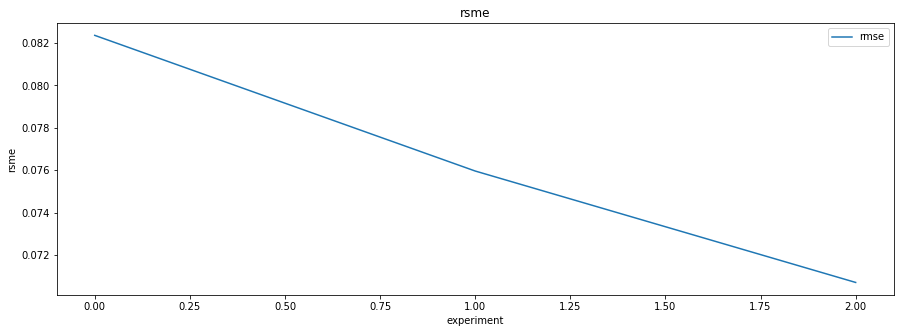

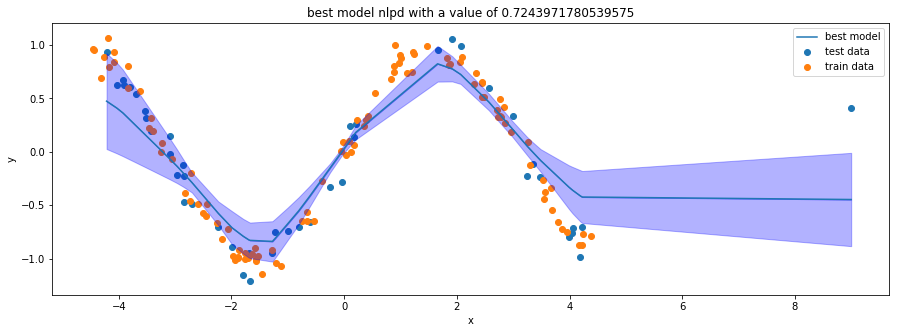

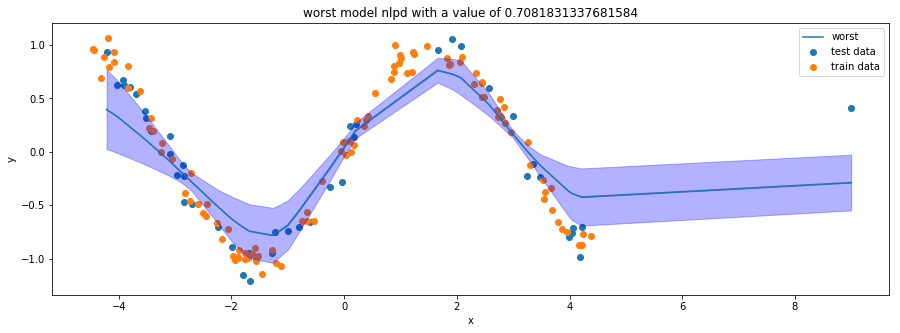

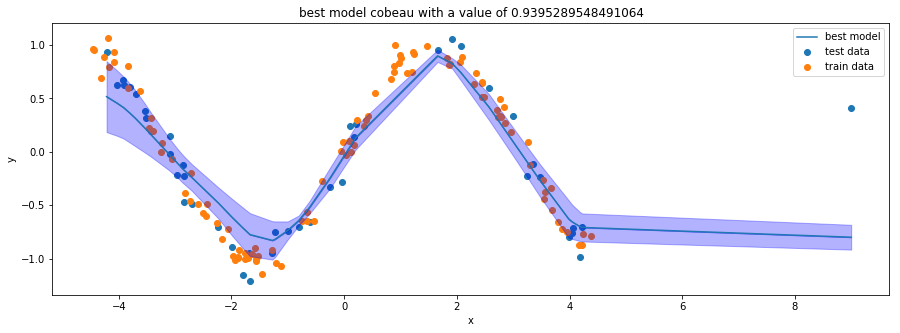

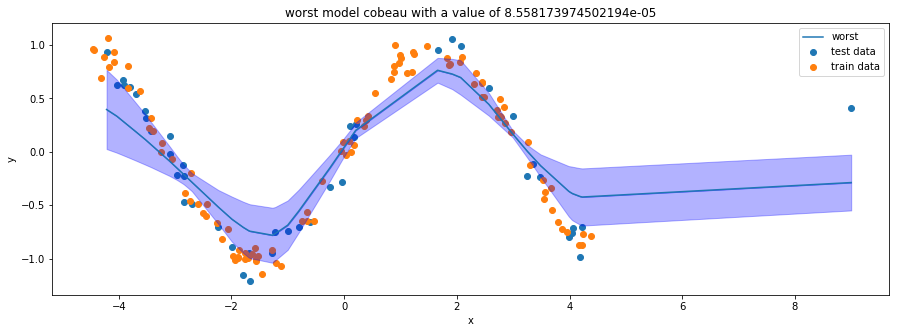

In [7]:
pd11 = repeat_experiment(BootstrapEnsemble, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-09 10:40:44.598585
experiment number 1 took 35.6748161315918 seconds. That means the whole run will probably take 107.02444839477539 more seconds and 1.7837408065795899 more minutes.
overall, it took 114.08870697021484 seconds with 3 experiments
         cobeau  coverage      nlpd      rsme
count  3.000000  3.000000  3.000000  3.000000
mean   0.005326  0.837037  0.178389  0.487025
std    0.007369  0.147963  0.757906  0.702174
min    0.000346  0.711111 -0.696470  0.080516
25%    0.001093  0.755556 -0.050174  0.081625
50%    0.001841  0.800000  0.596122  0.082734
75%    0.007816  0.900000  0.615818  0.690279
max    0.013791  1.000000  0.635515  1.297825
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  0.005326 &  0.837037 &  0.178389 &  0.487025 \\
std   &  0.007369 &  0.147963 &  0.757906 &  0.702174 \\
min   &  0.000346 &  0.711111 & -0.696470 & 

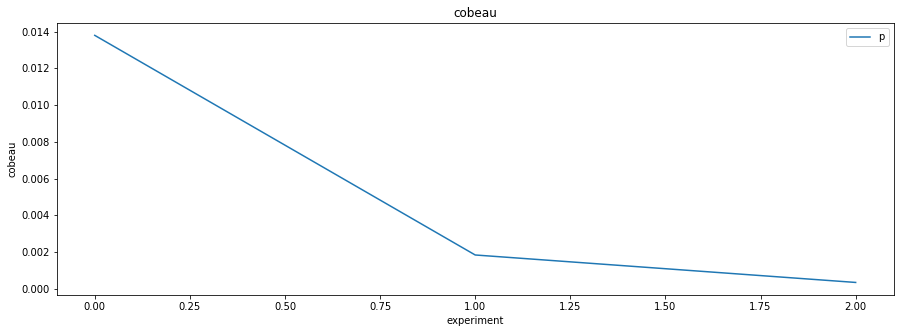

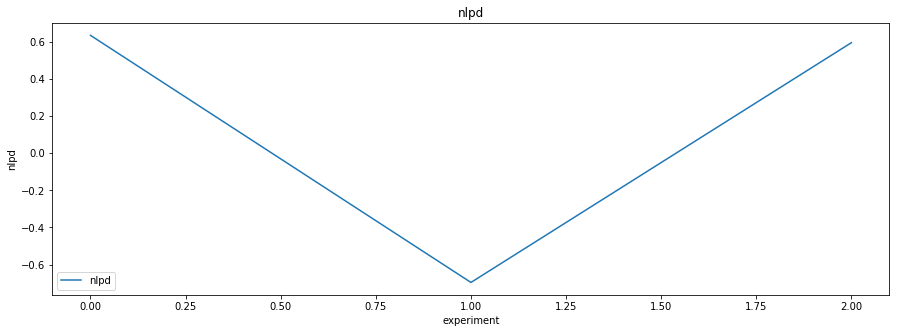

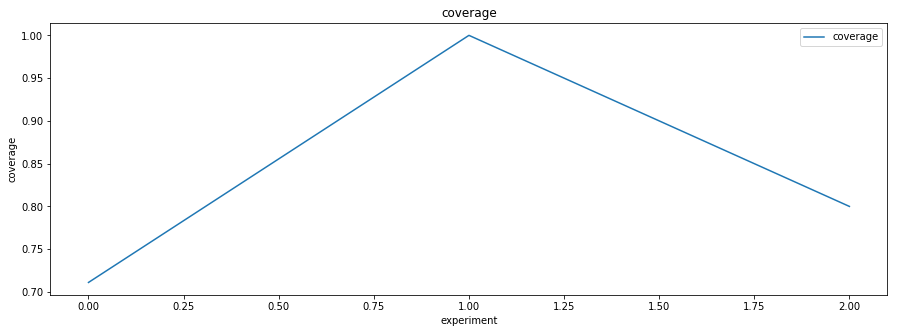

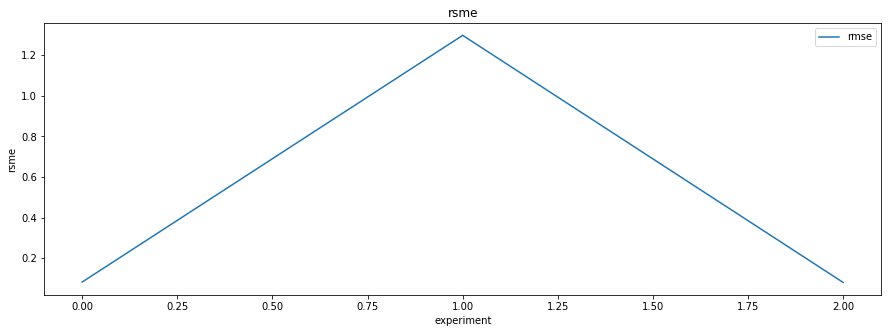

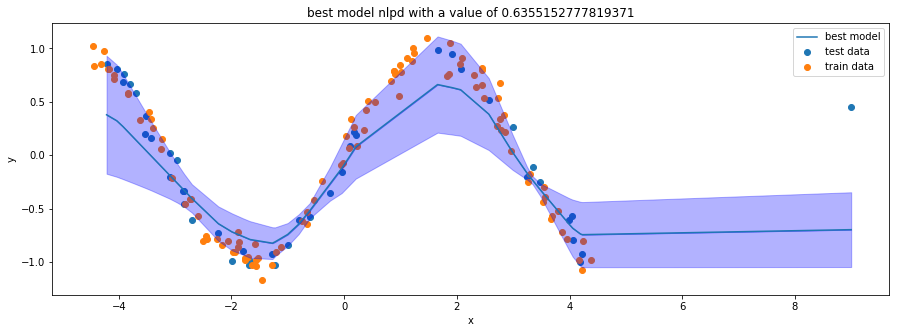

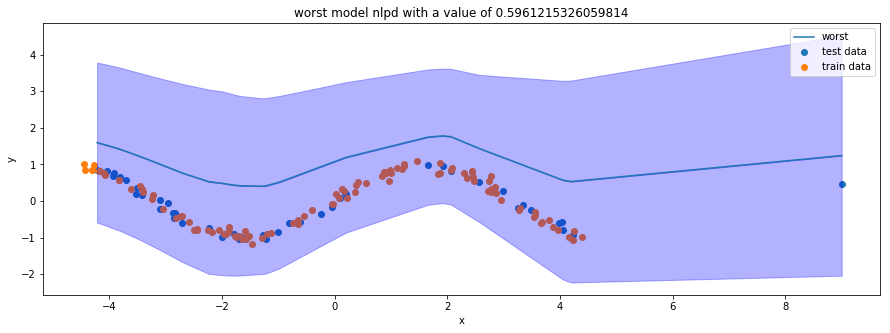

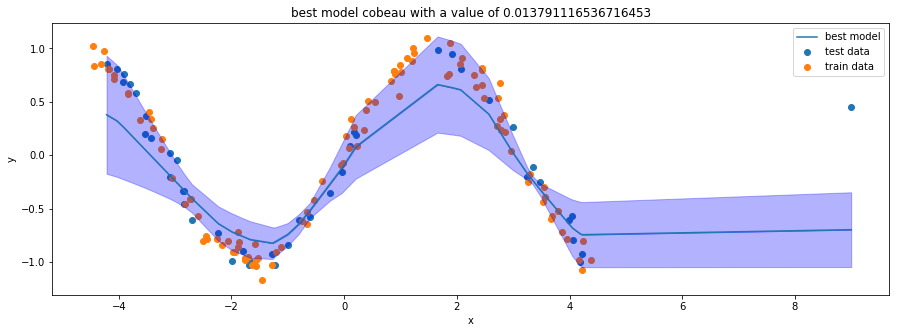

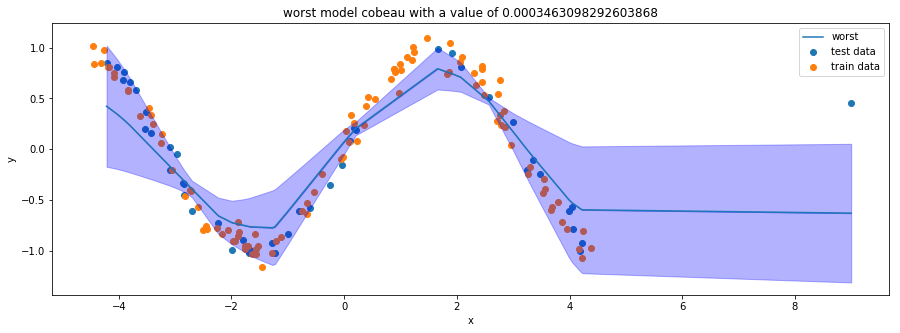

In [8]:
pd22 = repeat_experiment(ForcedDiversityBootstrapThroughTime, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

experiment started at 2018-08-09 10:42:43.431509
experiment number 1 took 44.52721619606018 seconds. That means the whole run will probably take 133.58164858818054 more seconds and 2.226360809803009 more minutes.
overall, it took 126.14611601829529 seconds with 3 experiments
         cobeau  coverage      nlpd      rsme
count  3.000000  3.000000  3.000000  3.000000
mean   0.279384  0.888889  0.254262  0.060023
std    0.456154  0.101835  0.624174  0.007009
min    0.000009  0.800000 -0.466140  0.054598
25%    0.016190  0.833333  0.064706  0.056066
50%    0.032370  0.866667  0.595553  0.057534
75%    0.419072  0.933333  0.614464  0.062735
max    0.805774  1.000000  0.633374  0.067936
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  0.279384 &  0.888889 &  0.254262 &  0.060023 \\
std   &  0.456154 &  0.101835 &  0.624174 &  0.007009 \\
min   &  0.000009 &  0.800000 & -0.466140 & 

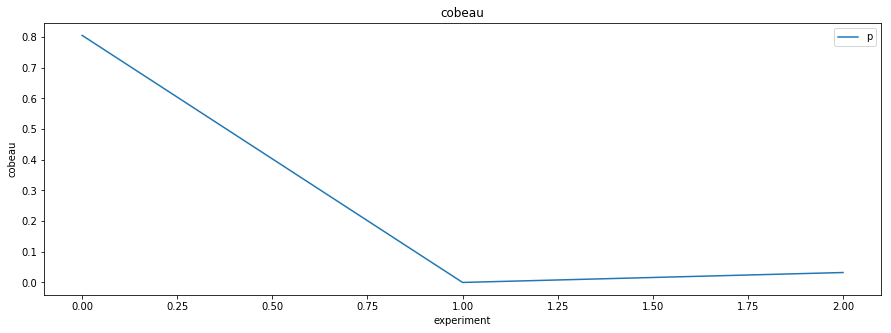

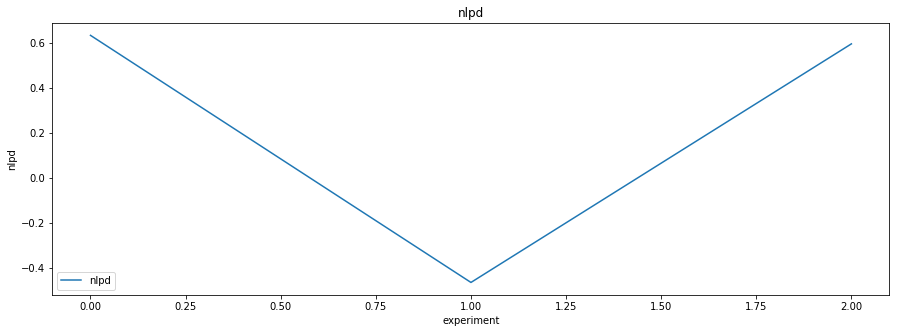

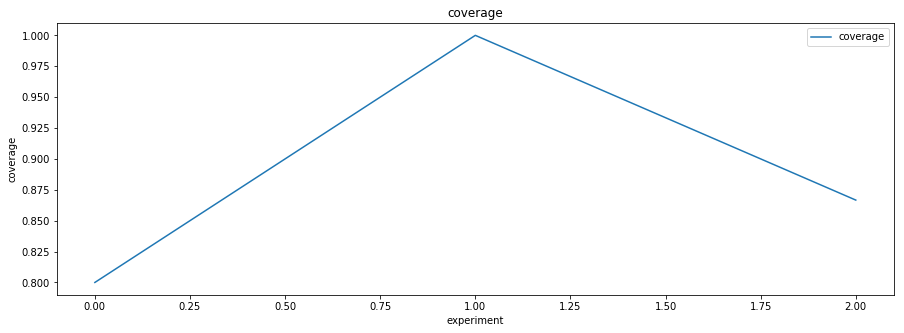

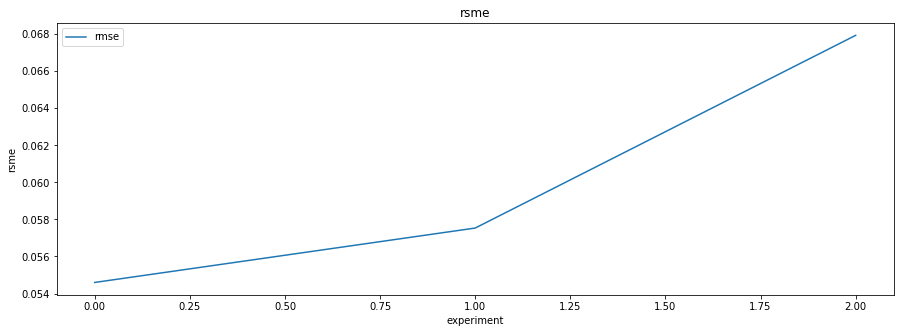

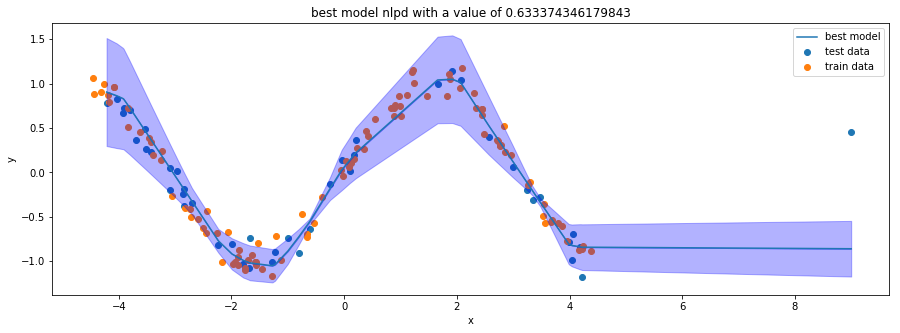

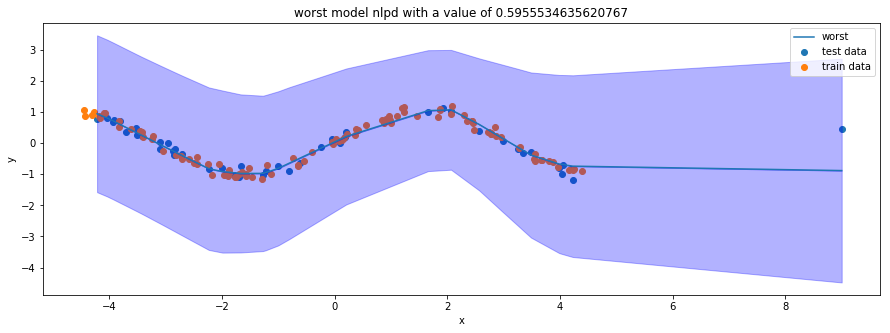

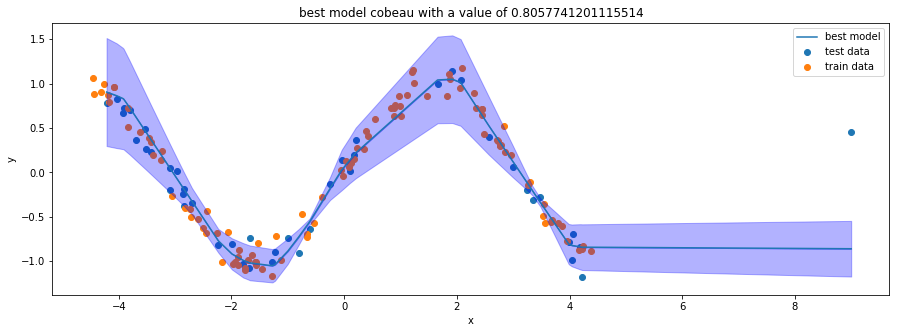

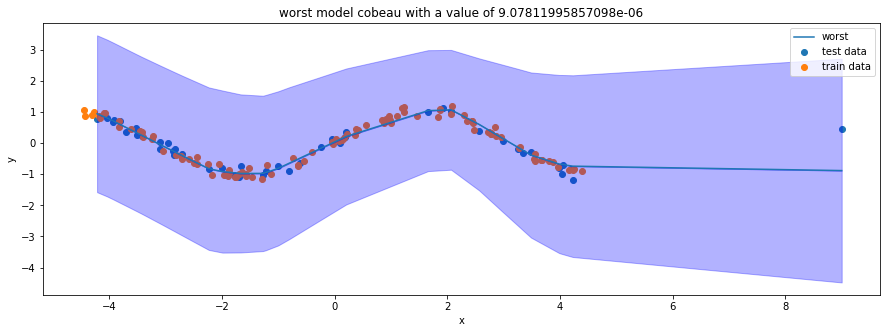

In [9]:
pd33 = repeat_experiment(ForcedDiversityBootstrapThroughTime3, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

In [ ]:
pd44 = repeat_experiment(BootstrapThroughTimeBobStrap, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

# X3

In [10]:
dataset_params = {'seed':seed,'num_samples':num_samples,'scope':7}


experiment started at 2018-08-09 10:44:54.420900
experiment number 1 took 22.60110116004944 seconds. That means the whole run will probably take 67.80330348014832 more seconds and 1.130055058002472 more minutes.
overall, it took 81.99703097343445 seconds with 3 experiments
         cobeau  coverage        nlpd         rsme
count  3.000000  3.000000    3.000000     3.000000
mean   0.100355  0.533333 -116.872859  2253.704520
std    0.076835  0.044444    6.492427    12.255103
min    0.036563  0.488889 -122.512143  2245.759719
25%    0.057707  0.511111 -120.421632  2246.647628
50%    0.078850  0.533333 -118.331121  2247.535537
75%    0.132250  0.555556 -114.053217  2257.676920
max    0.185651  0.577778 -109.775312  2267.818304
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &        nlpd &         rsme \\
\midrule
count &  3.000000 &  3.000000 &    3.000000 &     3.000000 \\
mean  &  0.100355 &  0.533333 & -116.872859 &  2253.704520 \\
std   &  0.076835 &  0.044444 &    6.492427

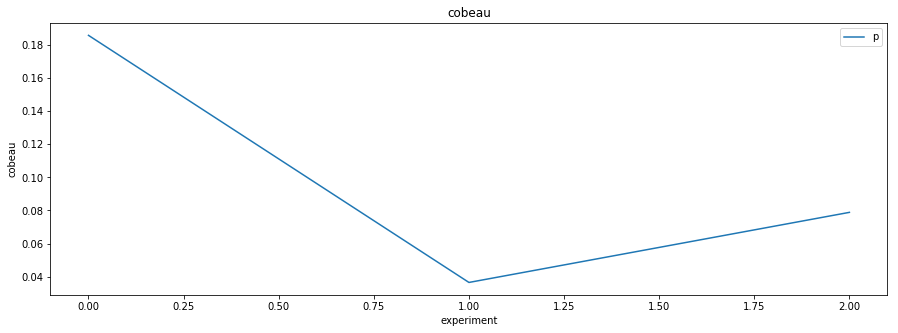

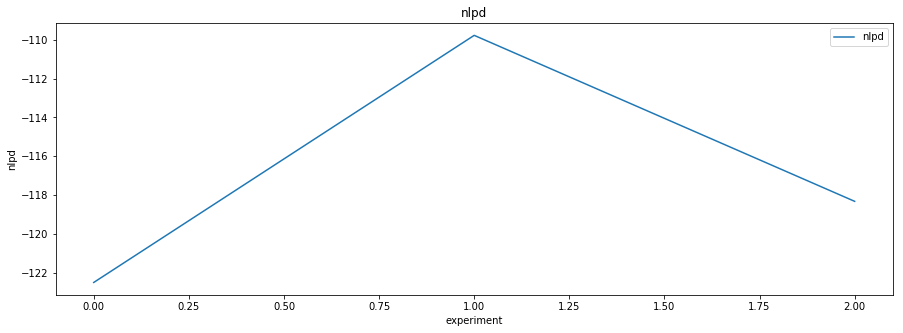

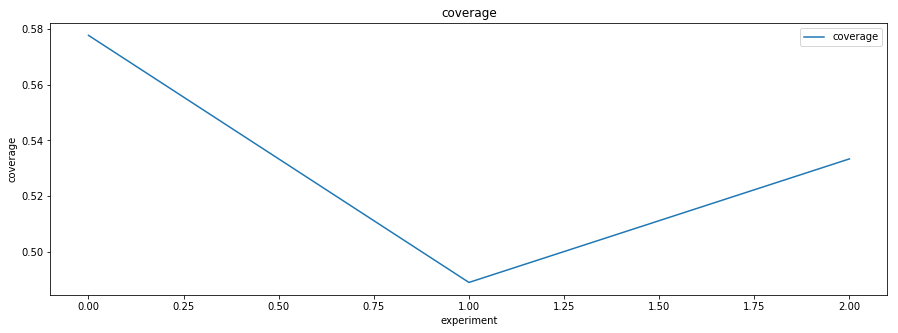

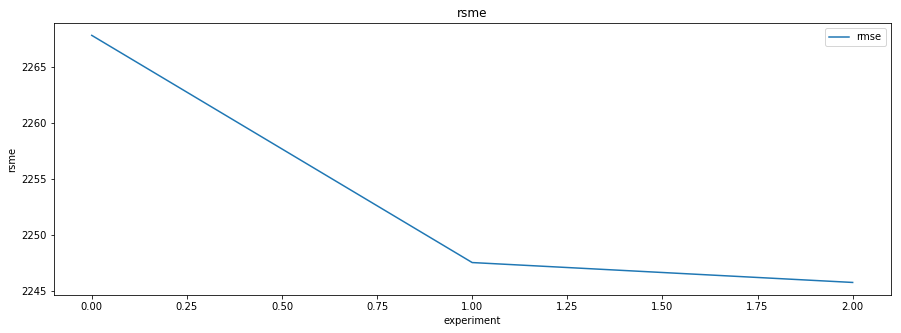

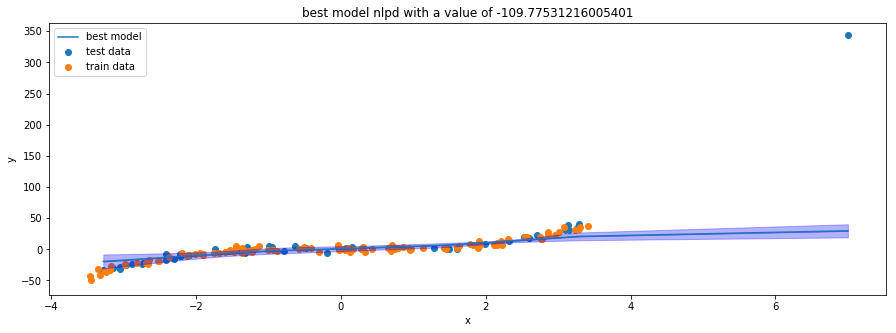

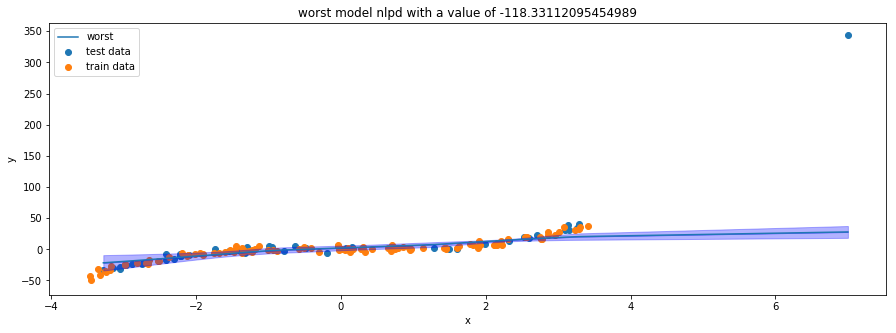

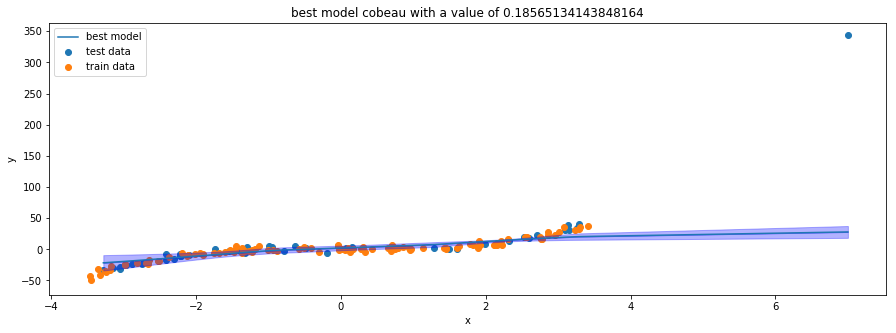

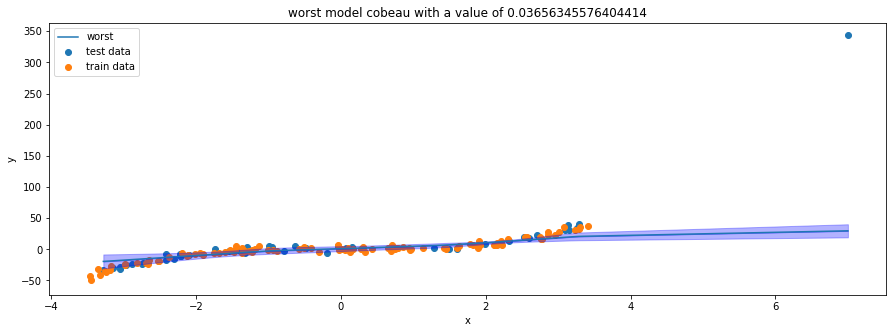

In [11]:
pd111 = repeat_experiment(BootstrapEnsemble, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-09 10:46:21.105916
experiment number 1 took 36.144147872924805 seconds. That means the whole run will probably take 108.43244361877441 more seconds and 1.8072073936462403 more minutes.
overall, it took 111.090500831604 seconds with 3 experiments
         cobeau  coverage       nlpd         rsme
count  3.000000  3.000000   3.000000     3.000000
mean   0.010171  0.674074 -71.037931  2148.232771
std    0.008993  0.055925   1.206953    82.857065
min    0.004591  0.622222 -72.396955  2066.451722
25%    0.004984  0.644444 -71.511409  2106.286414
50%    0.005377  0.666667 -70.625863  2146.121107
75%    0.012962  0.700000 -70.358420  2189.123295
max    0.020546  0.733333 -70.090976  2232.125484
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &       nlpd &         rsme \\
\midrule
count &  3.000000 &  3.000000 &   3.000000 &     3.000000 \\
mean  &  0.010171 &  0.674074 & -71.037931 &  2148.232771 \\
std   &  0.008993 &  0.055925 &   1.206953 &    82.85

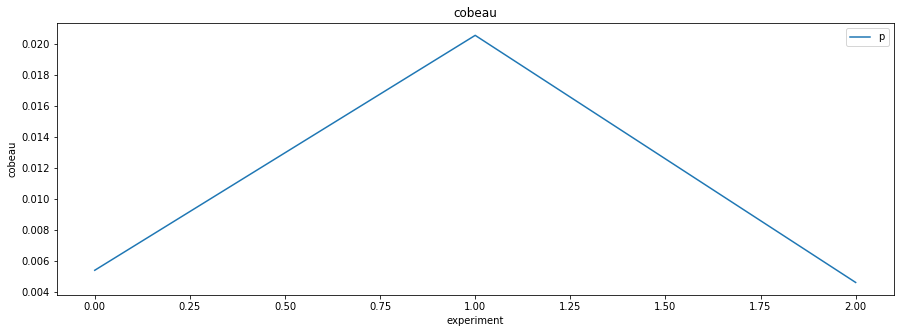

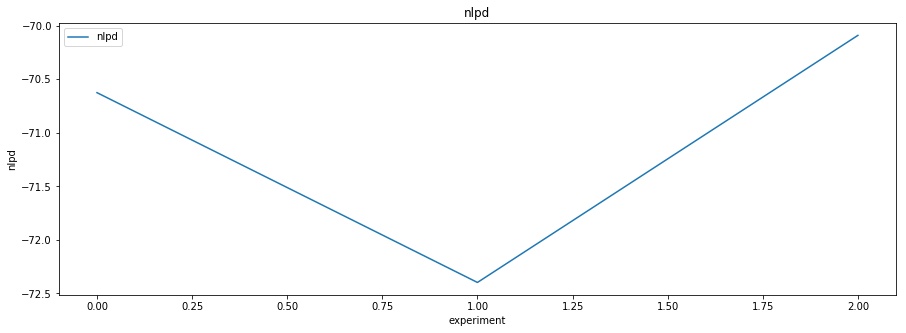

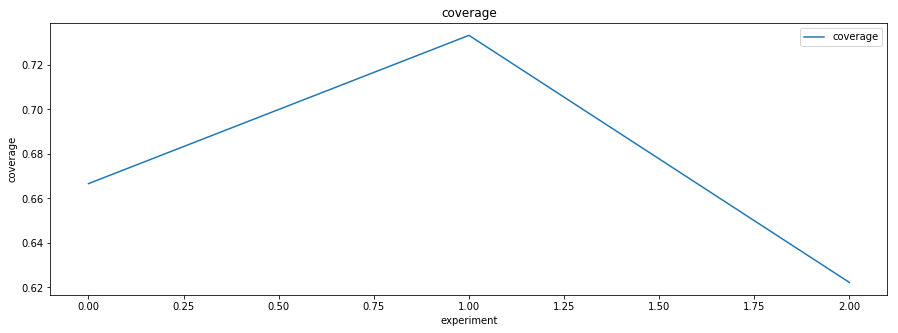

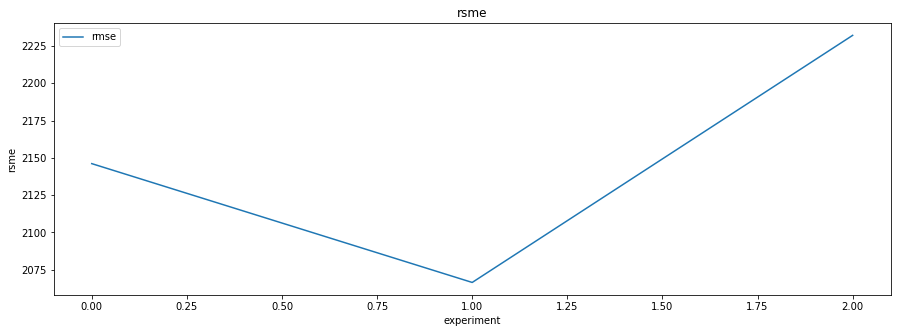

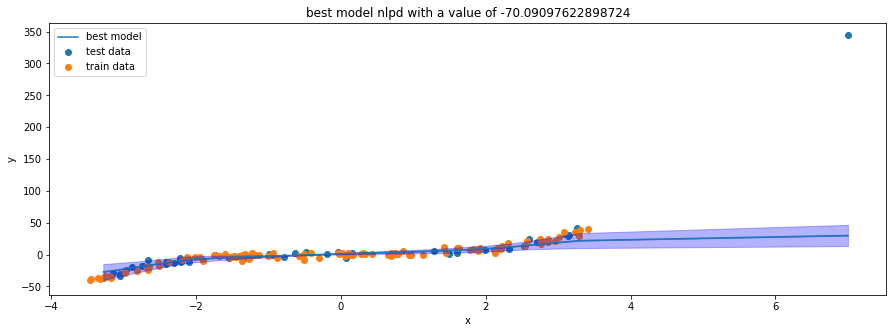

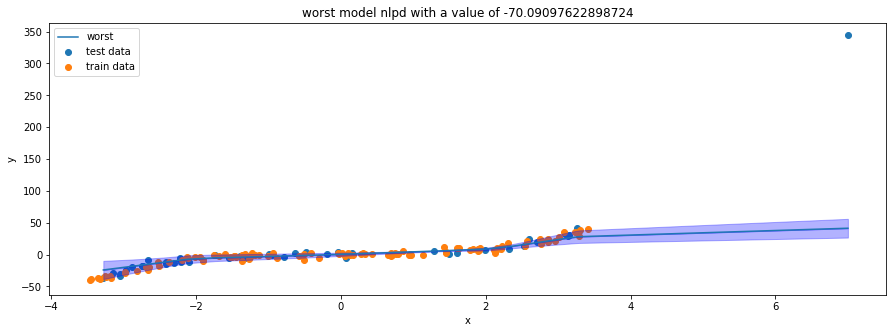

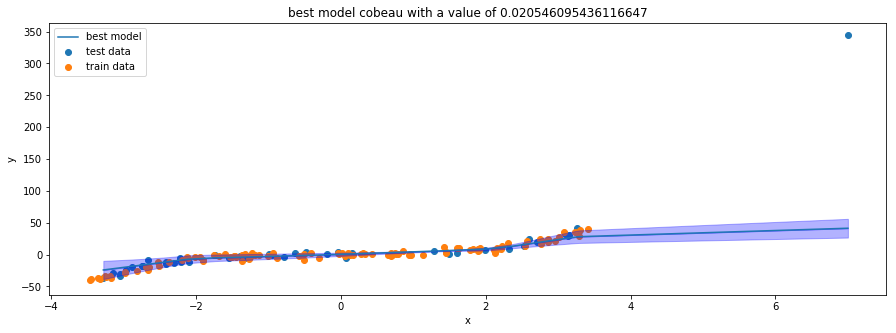

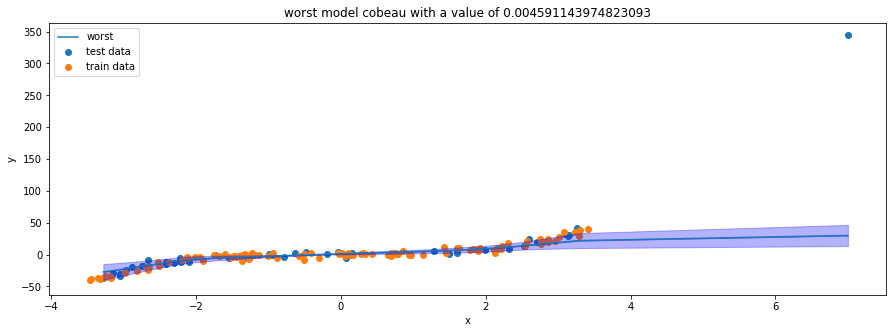

In [12]:
pd222 = repeat_experiment(ForcedDiversityBootstrapThroughTime, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

experiment started at 2018-08-09 10:48:16.947082
experiment number 1 took 36.781553983688354 seconds. That means the whole run will probably take 110.34466195106506 more seconds and 1.8390776991844178 more minutes.
overall, it took 113.7138340473175 seconds with 3 experiments
         cobeau  coverage       nlpd         rsme
count  3.000000  3.000000   3.000000     3.000000
mean   0.013408  0.755556 -60.744780  1944.530351
std    0.018446  0.044444  10.308097    13.147781
min    0.001524  0.711111 -72.526715  1934.069326
25%    0.002783  0.733333 -64.422790  1937.150922
50%    0.004043  0.755556 -56.318865  1940.232518
75%    0.019351  0.777778 -54.853813  1949.760864
max    0.034659  0.800000 -53.388760  1959.289209
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &       nlpd &         rsme \\
\midrule
count &  3.000000 &  3.000000 &   3.000000 &     3.000000 \\
mean  &  0.013408 &  0.755556 & -60.744780 &  1944.530351 \\
std   &  0.018446 &  0.044444 &  10.308097 &    13.1

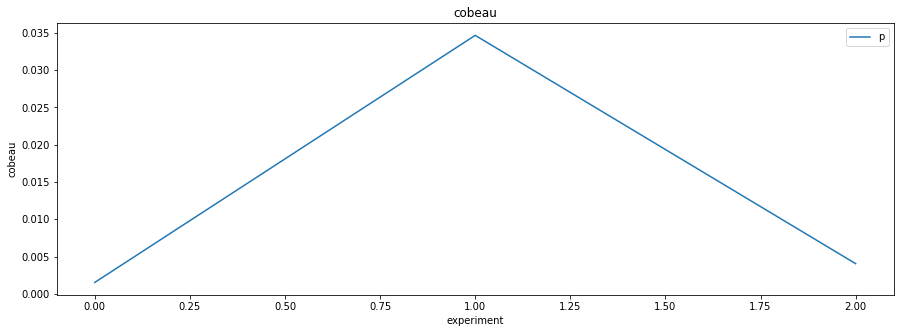

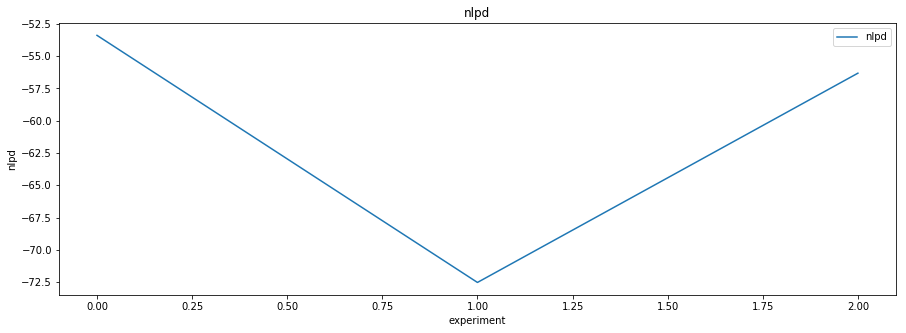

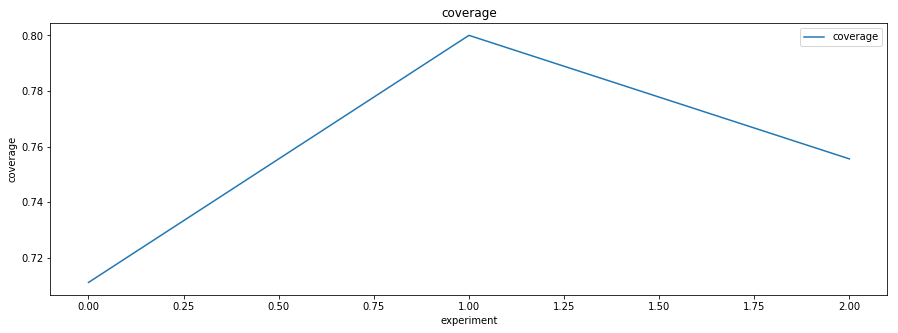

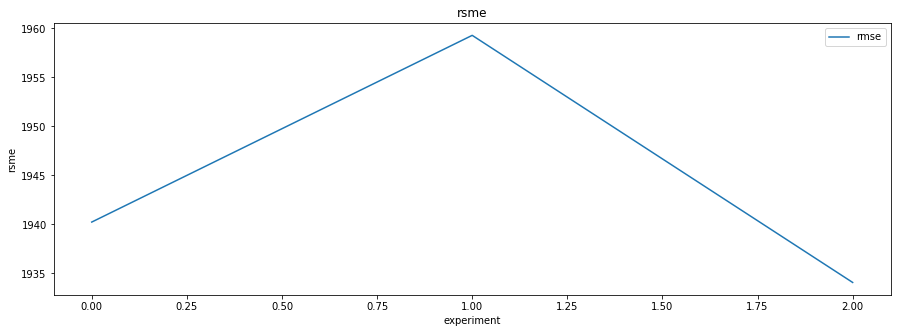

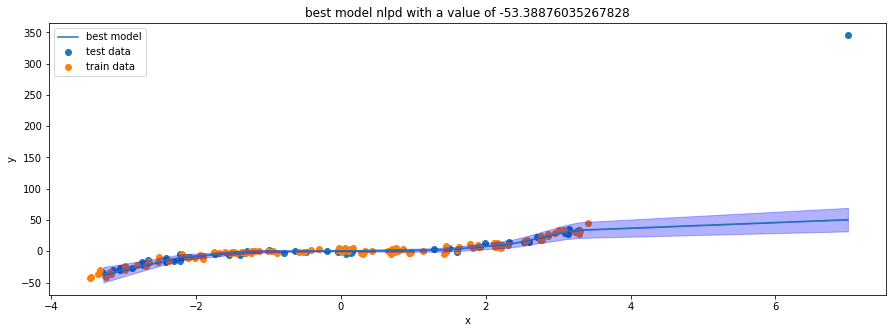

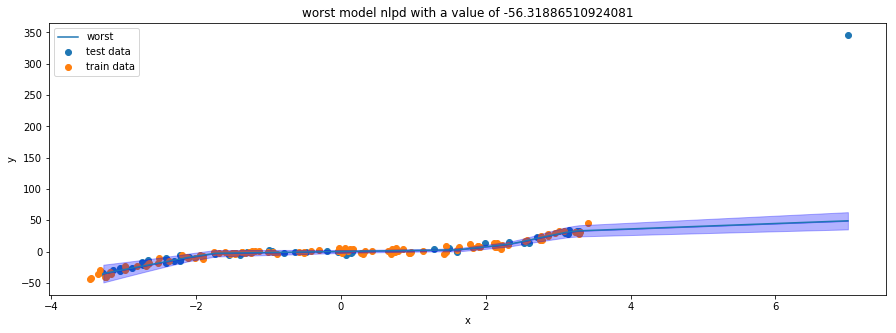

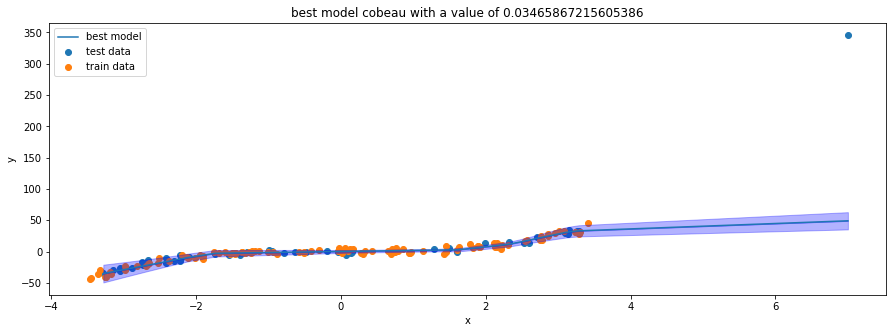

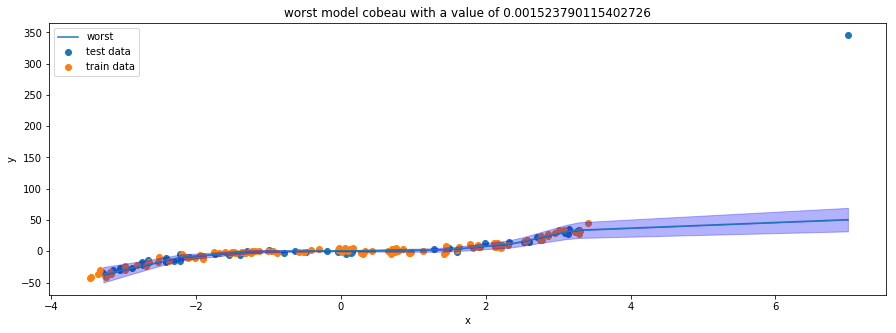

In [13]:
pd333 = repeat_experiment(ForcedDiversityBootstrapThroughTime3, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

In [ ]:
pd444 = repeat_experiment(BootstrapThroughTimeBobStrap, dataset_creation.XthreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)